In [28]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from sklearn.preprocessing import MinMaxScaler
from main import file_locate
from cse163_utils import assert_equals, check_approx_equals

In [29]:
# sets directory to access csv file
file_locate('data-cleaning.ipynb')

In [30]:
df = pd.read_csv('mit-framingham.csv') # This looks like the best dataset
df.info()
df1 = pd.read_csv('combined-heart-data.csv')
df1.info()
df2 = pd.read_csv('Heart_Disease_Prediction.csv')
df2.info()
print(df.isnull().mean().round(4).mul(100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
<class 'panda

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 14 to 4236
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             582 non-null    int64  
 1   age              582 non-null    int64  
 2   education        477 non-null    float64
 3   currentSmoker    582 non-null    int64  
 4   cigsPerDay       553 non-null    float64
 5   BPMeds           529 non-null    float64
 6   prevalentStroke  582 non-null    int64  
 7   prevalentHyp     582 non-null    int64  
 8   diabetes         582 non-null    int64  
 9   totChol          532 non-null    float64
 10  sysBP            582 non-null    float64
 11  diaBP            582 non-null    float64
 12  BMI              563 non-null    float64
 13  heartRate        581 non-null    float64
 14  glucose          194 non-null    float64
 15  TenYearCHD       582 non-null    int64  
dtypes: float64(9), int64(7)
memory usage: 77.3 KB


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

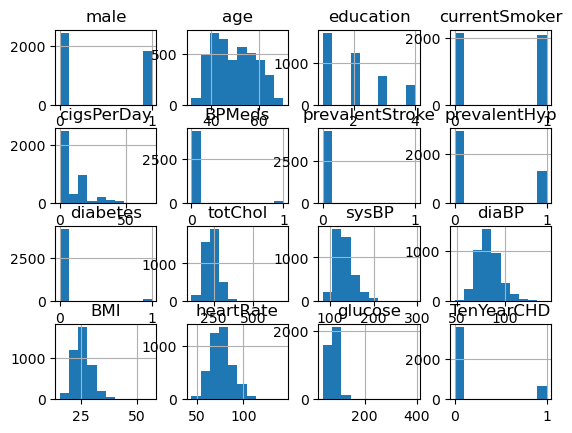

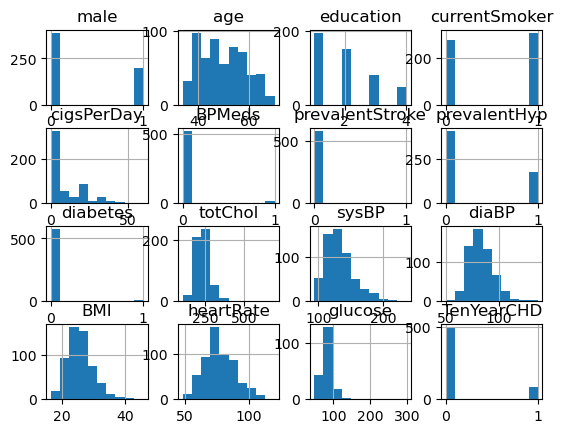

In [31]:
df_null = df[df.isna().any(axis = 1)]
df_null.info()
df.hist(layout = (4,4))
df_null.hist(layout=(4,4)) # missing data seems to have same distribution as rest of data
# cannot confirm without statistical tests
# small amount so ok to drop data instead of imputing

In [32]:
df = df.dropna() # drop all null values
df = df.drop('education', axis = 1)# remove education column
df = df.drop('currentSmoker', axis = 1) # redundant with cigsPerDay
df.drop_duplicates(subset=None, inplace=True) # drops any potential duplicates
df.describe()


,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [33]:
df.to_csv('cleaned-framingham.csv', index = False)

In [34]:
assert_equals(False, df.isnull().any().any())
assert_equals(False, set(['education','currentSmoker']).issubset(df.columns))
assert_equals(False, df.duplicated().any())